In [1]:
### Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
### Data path
path="C:\\Users\\Angus\\Documents\\UTS MDSI\\DVN\\Projects\\DVN_AT3\\data\\raw\\"

In [3]:
# join 1 and 2 then merge
df1 = pd.read_csv(path+"winequality-red.csv")
df2 = pd.read_csv(path+"winemag-data-130k-v2.csv")
df3 = pd.read_csv(path+"winemag-data_first150k.csv")

In [20]:
# clean reviews
key_features = ['country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery']

df2_clean = df2[key_features]
df3_clean = df3[key_features]

df_rev = df2_clean.append(df3_clean)
top_wine_df = df_rev[df_rev['points'] >= 95]
top_varieties = top_wine_df.variety.unique()
#variety cleaned data, otherwise too many varieties
df_rev = df_rev.loc[df_rev['variety'].isin(top_varieties)]


In [37]:
# only df2 has title feature to get the year
df2_focus = df2.loc[df2['variety'].isin(top_varieties)]
# add variabel year
year = ['1970',	'1971',	'1972',	'1973',	'1974',	'1975',	'1976',	'1977',	'1978',	'1979',	'1980',
'1981',	'1982',	'1983',	'1984',	'1985',	'1986',	'1987',	'1988',	'1989',	'1990',	'1991',	'1992',
'1993',	'1994',	'1995',	'1996',	'1997',	'1998',	'1999',	'2000',	'2001',	'2002',	'2003',	'2004',
'2005',	'2006',	'2007',	'2008',	'2009',	'2010',	'2011',	'2012',	'2013',	'2014',	'2015',	'2016',
'2017',	'2018',	'2019',	'2020']
df2_focus['year'] = np.nan

for i in range(0,len(df2_focus)):
    for j in year:
        if j in df2_focus.iloc[i,11]: 
            df2_focus.iloc[i,14] = j

In [38]:
df2_focus['year'] = df2_focus['year'].astype('float')
df2_focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114142 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             114142 non-null  int64  
 1   country                114096 non-null  object 
 2   description            114142 non-null  object 
 3   designation            81601 non-null   object 
 4   points                 114142 non-null  int64  
 5   price                  106468 non-null  float64
 6   province               114096 non-null  object 
 7   region_1               95804 non-null   object 
 8   region_2               47852 non-null   object 
 9   taster_name            91263 non-null   object 
 10  taster_twitter_handle  86770 non-null   object 
 11  title                  114142 non-null  object 
 12  variety                114142 non-null  object 
 13  winery                 114142 non-null  object 
 14  year                   110536 non-nu

In [43]:
df_rev.variety.unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Gewürztraminer', 'Cabernet Sauvignon',
       'Nerello Mascalese', 'Chardonnay', 'Malbec', 'Tempranillo Blend',
       'Red Blend', 'Merlot', 'Chenin Blanc', 'Sauvignon Blanc',
       'Bordeaux-style White Blend', 'Sangiovese', 'Cabernet Franc',
       'Champagne Blend', 'Bordeaux-style Red Blend', 'Aglianico',
       'Petite Sirah', 'Touriga Nacional', 'Petit Manseng', 'Rosé',
       'Zinfandel', 'Grüner Veltliner', 'Viognier', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Alsace white blend',
       'Rhône-style Red Blend', 'Portuguese White', 'Sauvignon',
       'Sangiovese Grosso', 'Prugnolo Gentile', 'G-S-M', 'Fumé Blanc',
       'Furmint', 'Pinot Bianco', 'Shiraz', 'Montepulciano', 'Moscato',
       'Grenache', 'Blaufränkisch', 'Friulano', 'Sagrantino',
       'Cabernet Sauvignon-Syrah', 'Sparkling Blend', 'Muscat',
       'Muscadelle', 'Shiraz-Viognier', 'Garganega', 'Tempranillo'

In [44]:
top_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5397 entries, 345 to 150762
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5397 non-null   object 
 1   description  5397 non-null   object 
 2   designation  4405 non-null   object 
 3   points       5397 non-null   int64  
 4   price        4725 non-null   float64
 5   province     5397 non-null   object 
 6   region_1     4926 non-null   object 
 7   region_2     2288 non-null   object 
 8   variety      5397 non-null   object 
 9   winery       5397 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 463.8+ KB


In [45]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248295 entries, 0 to 150928
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      248245 non-null  object 
 1   description  248295 non-null  object 
 2   designation  175474 non-null  object 
 3   points       248295 non-null  int64  
 4   price        228870 non-null  float64
 5   province     248245 non-null  object 
 6   region_1     208035 non-null  object 
 7   region_2     105956 non-null  object 
 8   variety      248295 non-null  object 
 9   winery       248295 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 20.8+ MB


In [46]:
print(df1.info())
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [47]:
print(df2.info())
df2.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [48]:
print(df3.info())
df3.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
None


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


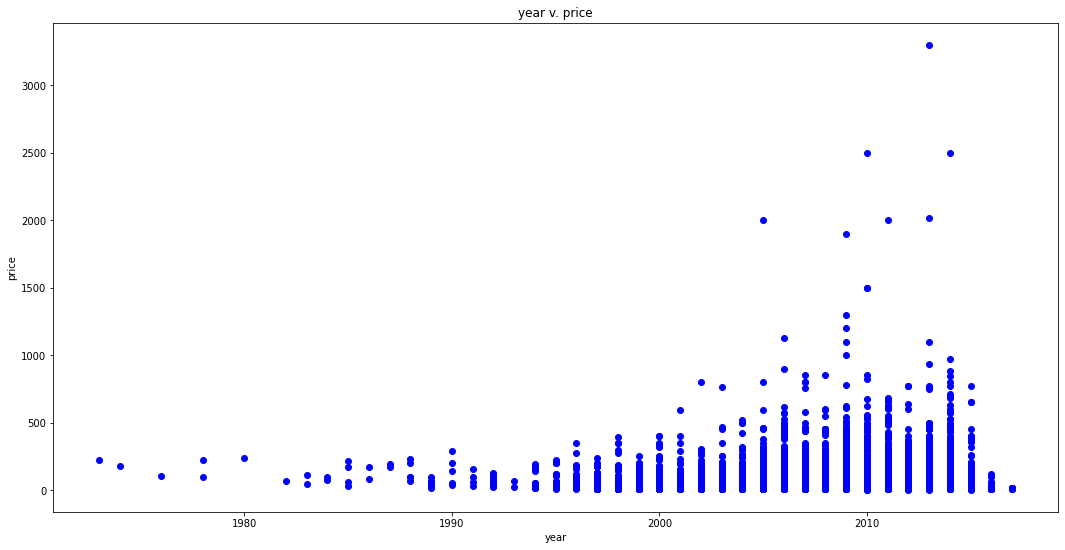

In [49]:
### Year v. price

# Make Scatter plot
fig, ax=plt.subplots(figsize = (18,9))
ax.scatter(df2_focus["year"], df2_focus["price"], color='b')
ax.set_xlabel('year')
ax.set_ylabel('price')
plt.title('year v. price')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

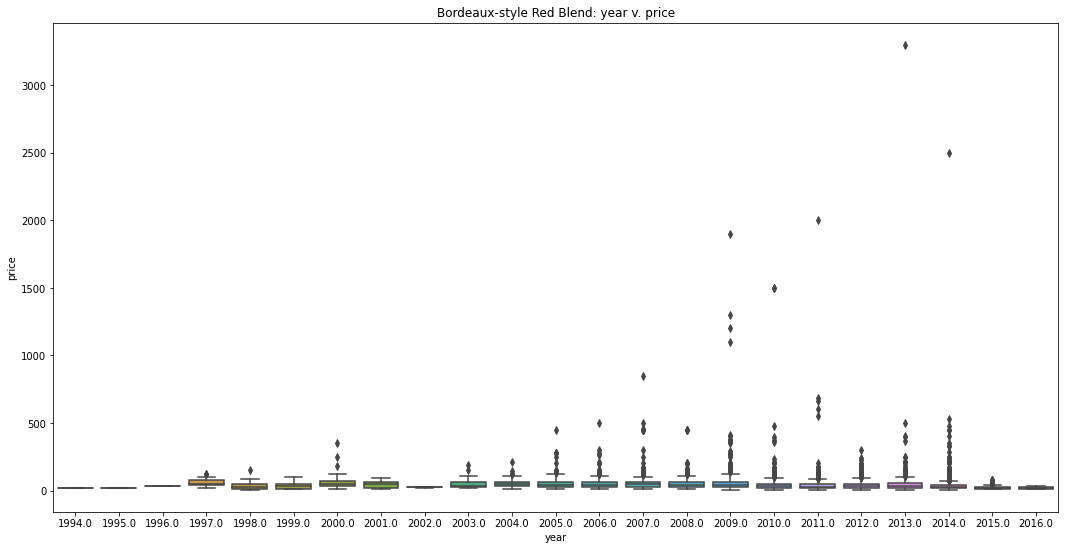

In [50]:
### Bordeaux year v price
bordeaux = df2_focus[df2_focus['variety'] == 'Bordeaux-style Red Blend']
# Make Scatter plot
fig, ax=plt.subplots(figsize = (18,9))
sns.boxplot(y="price", x="year", data=bordeaux)
ax.set_xlabel('year')
ax.set_ylabel('price')
plt.title('Bordeaux-style Red Blend: year v. price')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

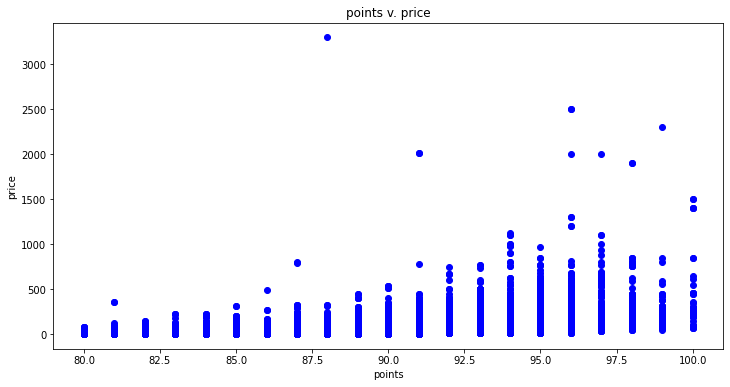

In [51]:
### Points v. price

# Make Scatter plot
fig, ax=plt.subplots(figsize = (12,6))
ax.scatter(df_rev["points"], df_rev["price"], color='b')
ax.set_xlabel('points')
ax.set_ylabel('price')
plt.title('points v. price')
#ax.set_xlim([-1, 10.5])
#ax.set_ylim([0, 100])
plt.show()

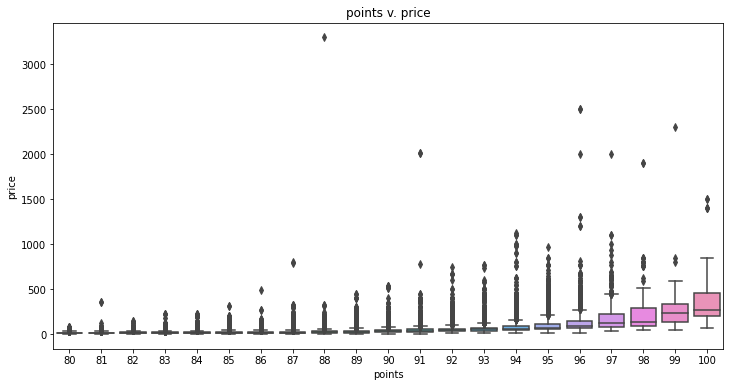

In [52]:
#Make boxplot distribution 
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(y="price", x="points", data=df_rev)
ax.set_xlabel('points')
ax.set_ylabel('price')
ax.set_title('points v. price')
plt.show()

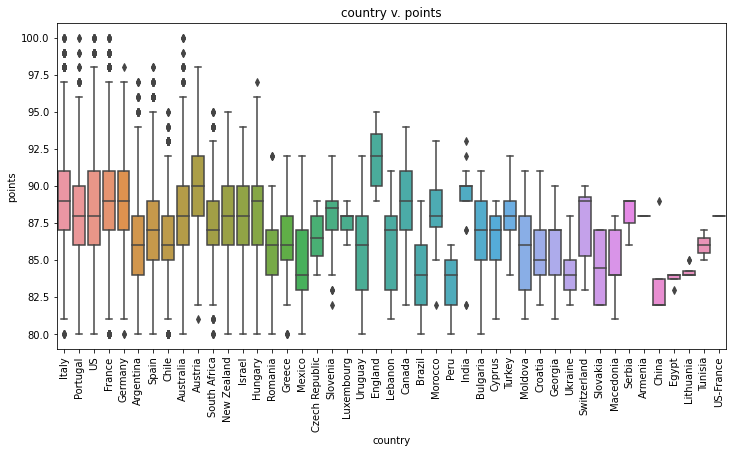

In [53]:
#Make boxplot distribution 
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(y="points", x="country", data=df_rev)
ax.set_xlabel('country')
ax.set_ylabel('points')
ax.set_title('country v. points')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

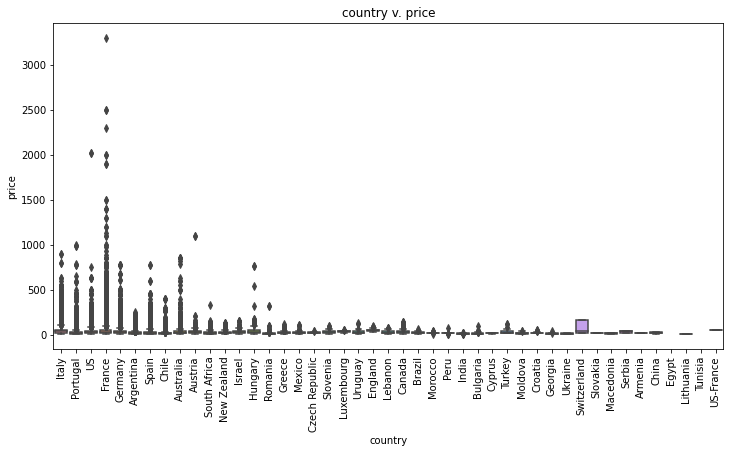

In [54]:
#Make boxplot distribution 
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(y="price", x="country", data=df_rev)
ax.set_xlabel('country')
ax.set_ylabel('price')
ax.set_title('country v. price')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

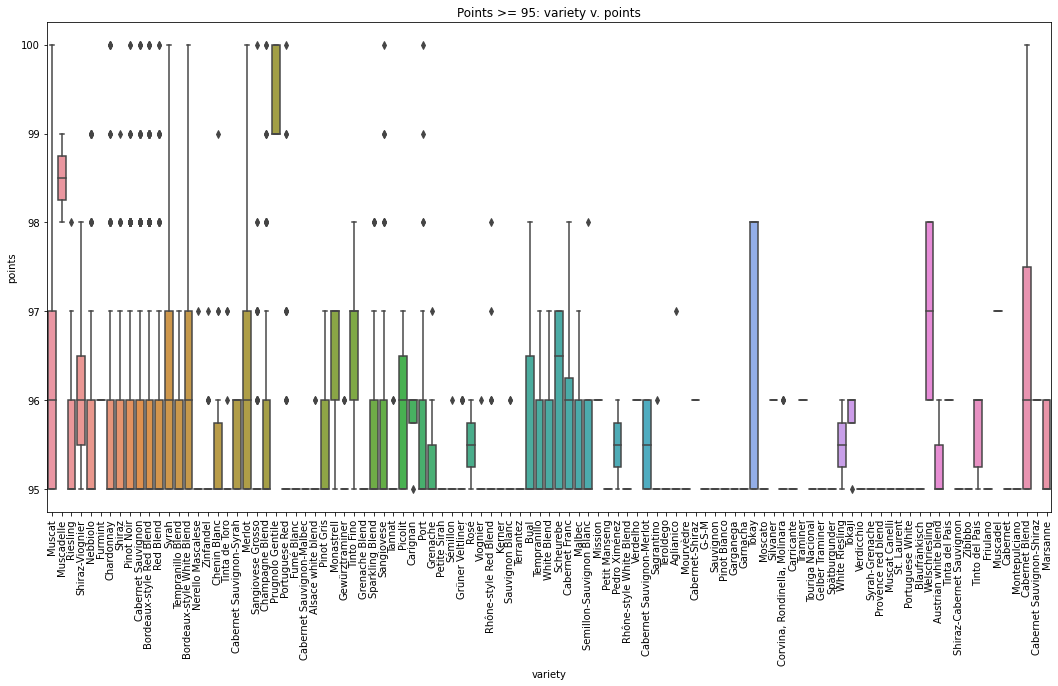

In [55]:
### Points >= 95

#Make boxplot distribution 
fig, ax = plt.subplots(figsize = (18,9))
sns.boxplot(y="points", x="variety", data=top_wine_df)
ax.set_xlabel('variety')
ax.set_ylabel('points')
ax.set_title('Points >= 95: variety v. points')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

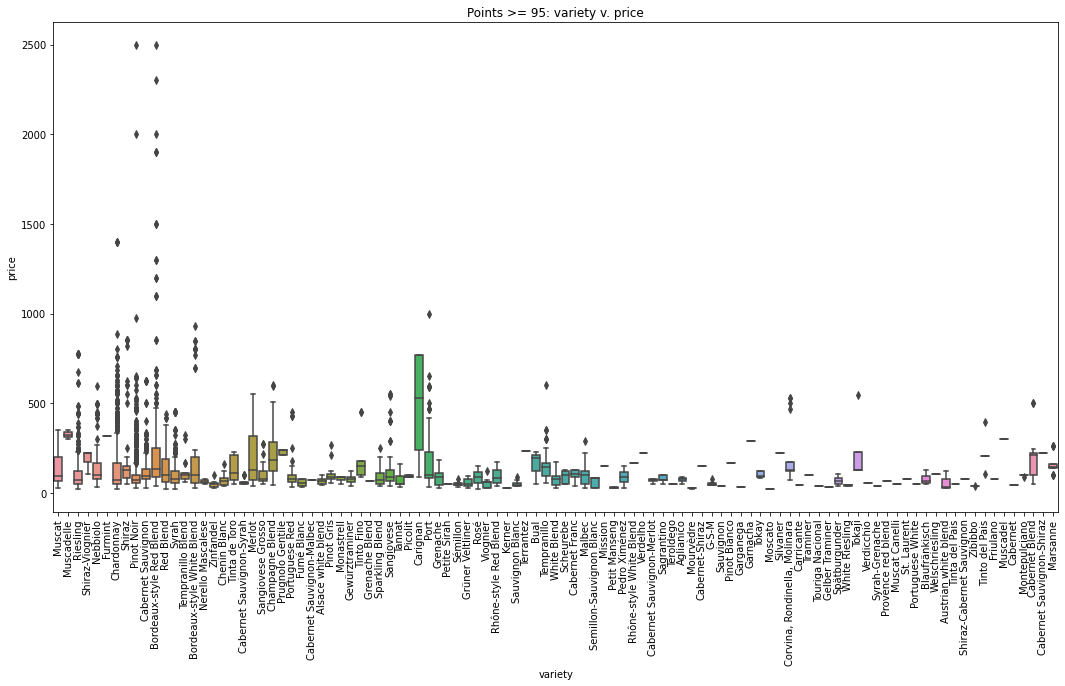

In [56]:
### Points >= 95

#Make boxplot distribution 
fig, ax = plt.subplots(figsize = (18,9))
sns.boxplot(y="price", x="variety", data=top_wine_df)
ax.set_xlabel('variety')
ax.set_ylabel('price')
ax.set_title('Points >= 95: variety v. price')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [57]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [58]:
# Sunburst plot with plotly

fig = px.sunburst(top_wine_df, path=['country', 'variety'], values='points', color='country',
                 title="Sunburst plot of points>=95/100 across country and variety", width=1200, height=600)
fig.show()